In [23]:
# print("jai bajrang bali")

jai bajrang bali


In [24]:
# !pip install -q yfinance

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [26]:
# # Define the stock tickers you're interested in
# # watchlist = ['SPY', 'IWM', 'QQQ', 'TLT', 'GLD', 'SLV', 'USO', 'XRT', 'XLU', 'XBI']
# watchlist = ['SPY']

# # Calculate yesterday's date
# yesterday = datetime.now() - timedelta(1)
# oneyearago = datetime.now() - timedelta(365)

# # Convert yesterday's date to the format yfinance expects (YYYY-MM-DD)
# yesterday_str = yesterday.strftime('%Y-%m-%d')
# oneyearago_str = oneyearago.strftime('%Y-%m-%d')

# # Fetch historical data for these tickers
# data = yf.download(watchlist, start=oneyearago_str, end=yesterday_str)

# # Display the first few rows of the fetched data
# print(data.tail())


In [27]:
# # Calculate moving averages
# data['1-Week MA'] = data['Adj Close'].rolling(window=5).mean()
# data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()
# data['3-Month MA'] = data['Adj Close'].rolling(window=60).mean()

# # Plotting
# plt.figure(figsize=(14, 7))
# plt.plot(data['Adj Close'], label='Actual Prices', color='skyblue')
# plt.plot(data['1-Week MA'], label='1-Week Moving Average', color='orange', linestyle='--')
# plt.plot(data['1-Month MA'], label='1-Month Moving Average', color='green', linestyle='--')
# plt.plot(data['3-Month MA'], label='3-Month Moving Average', color='red', linestyle='--')

# plt.title(f'Price Trend for {ticker}')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [28]:
# # Define your watchlist of stock tickers
# tickers = ['SPY', 'IWM', 'QQQ', 'TLT', 'GLD', 'SLV', 'USO', 'XRT', 'XLU', 'XBI']

# # Calculate yesterday's date for the end parameter
# yesterday = datetime.now() - timedelta(1)
# yesterday_str = yesterday.strftime('%Y-%m-%d')

# oneyearago = datetime.now() - timedelta(365)
# oneyearago_str = oneyearago.strftime('%Y-%m-%d')

# for ticker in tickers:
#     # Fetch historical data for the ticker up until yesterday
#     data = yf.download(ticker, start='2020-01-01', end=yesterday_str)

#     # Calculate moving averages
#     data['1-Week MA'] = data['Adj Close'].rolling(window=5).mean()
#     data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()
#     data['3-Month MA'] = data['Adj Close'].rolling(window=60).mean()

#     # Plotting
#     plt.figure(figsize=(14, 7))
#     plt.plot(data['Adj Close'], label='Actual Prices', color='skyblue')
#     plt.plot(data['1-Week MA'], label='1-Week Moving Average', color='orange', linestyle='--')
#     plt.plot(data['1-Month MA'], label='1-Month Moving Average', color='green', linestyle='--')
#     plt.plot(data['3-Month MA'], label='3-Month Moving Average', color='red', linestyle='--')

#     plt.title(f'Price Trend for {ticker}')
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.show()

In [29]:
# import matplotlib.pyplot as plt
# import yfinance as yf
# from datetime import datetime, timedelta
# import numpy as np

# # Example ticker
# ticker = 'SPY'

# # Fetch historical data
# yesterday = datetime.now() - timedelta(1)
# yesterday_str = yesterday.strftime('%Y-%m-%d')
# data = yf.download(ticker, start='2023-01-01', end=yesterday_str)

# # Calculate moving averages
# data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()
# data['3-Month MA'] = data['Adj Close'].rolling(window=60).mean()

# # Find crossover points
# buy_signals = (data['1-Month MA'] > data['3-Month MA']) & (data['1-Month MA'].shift(1) <= data['3-Month MA'].shift(1))
# sell_signals = (data['1-Month MA'] < data['3-Month MA']) & (data['1-Month MA'].shift(1) >= data['3-Month MA'].shift(1))

# # Plotting
# plt.figure(figsize=(14, 7))
# plt.plot(data['Adj Close'], label='Actual Prices', color='skyblue', alpha=0.6)
# plt.plot(data['1-Month MA'], label='1-Month Moving Average', color='green', alpha=0.6)
# plt.plot(data['3-Month MA'], label='3-Month Moving Average', color='red', alpha=0.6)

# # Plot buy signals
# for x in data[buy_signals].index:
#     plt.annotate('↑', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,5), ha='center', color='green', fontsize=12)

# # Plot sell signals
# for x in data[sell_signals].index:
#     plt.annotate('↓', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,-15), ha='center', color='red', fontsize=12)

# plt.title(f'Price Trend and Crossover Signals for {ticker}')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [30]:
# import matplotlib.pyplot as plt
# import yfinance as yf
# from datetime import datetime, timedelta
# import numpy as np

# # Example ticker
# ticker = 'SPY'

# # Fetch historical data
# yesterday = datetime.now() - timedelta(1)
# yesterday_str = yesterday.strftime('%Y-%m-%d')
# data = yf.download(ticker, start='2020-01-01', end=yesterday_str)

# # Calculate moving averages
# data['1-Week MA'] = data['Adj Close'].rolling(window=5).mean()
# data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()
# data['3-Month MA'] = data['Adj Close'].rolling(window=60).mean()

# # Find crossover points for buy and sell signals
# buy_signals = (data['1-Month MA'] > data['3-Month MA']) & (data['1-Month MA'].shift(1) <= data['3-Month MA'].shift(1))
# sell_signals = (data['1-Month MA'] < data['3-Month MA']) & (data['1-Month MA'].shift(1) >= data['3-Month MA'].shift(1))

# # Plotting
# plt.figure(figsize=(14, 7))
# plt.plot(data['Adj Close'], label='Actual Prices', color='skyblue', alpha=0.6)
# plt.plot(data['1-Week MA'], label='1-Week Moving Average', color='orange', alpha=0.6)
# plt.plot(data['1-Month MA'], label='1-Month Moving Average', color='green', alpha=0.6)
# plt.plot(data['3-Month MA'], label='3-Month Moving Average', color='red', alpha=0.6)

# # Plot buy signals
# for x in data[buy_signals].index:
#     plt.annotate('↑', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,10), ha='center', color='green', fontsize=12)

# # Plot sell signals
# for x in data[sell_signals].index:
#     plt.annotate('↓', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,-20), ha='center', color='red', fontsize=12)

# plt.title(f'Price Trend and Crossover Signals for {ticker}')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

[*********************100%%**********************]  1 of 1 completed


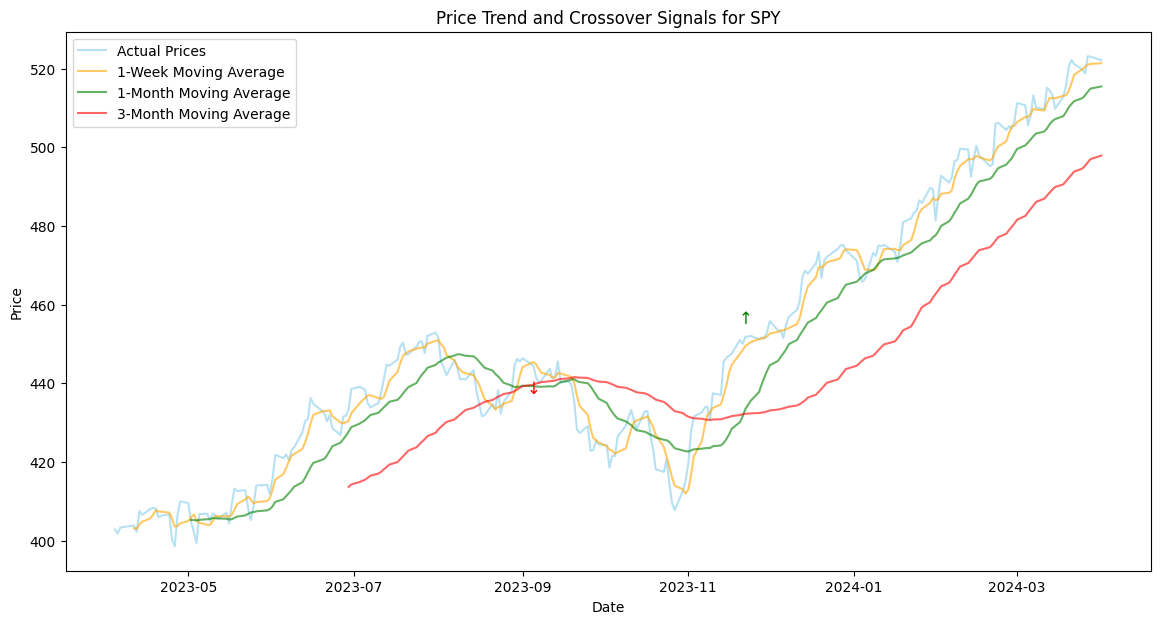

[*********************100%%**********************]  1 of 1 completed


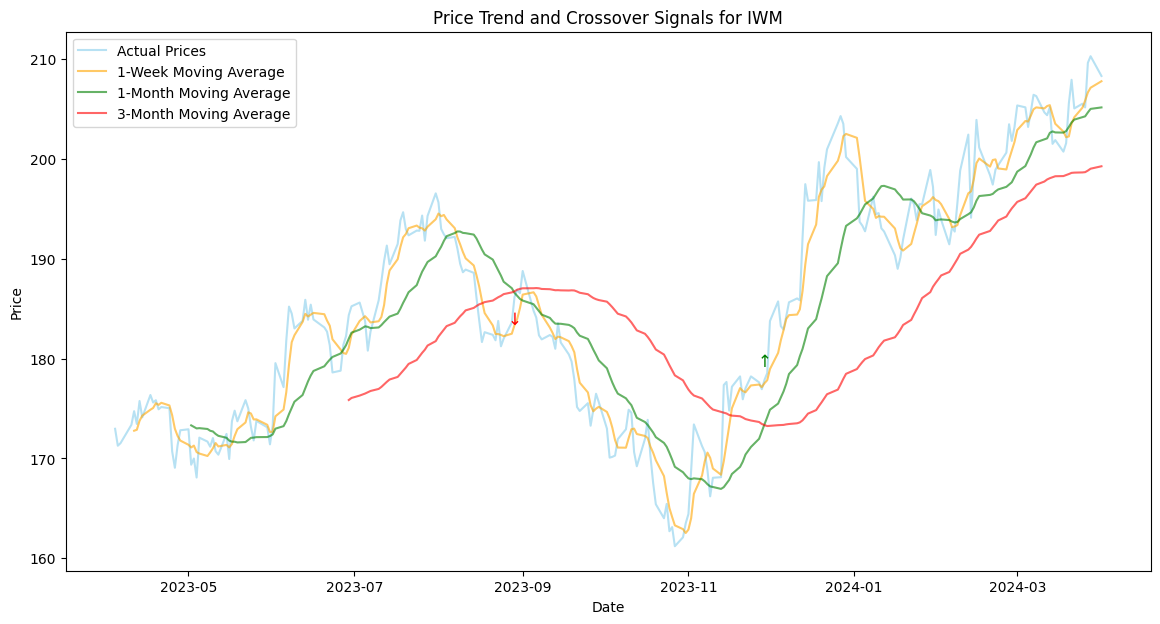

[*********************100%%**********************]  1 of 1 completed


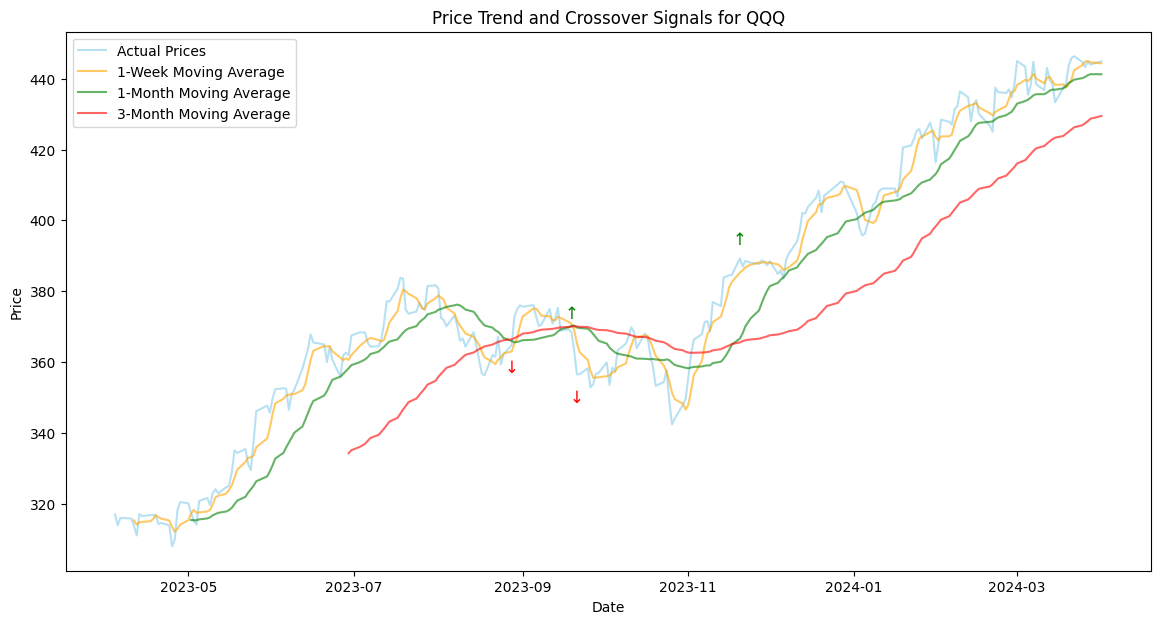

[*********************100%%**********************]  1 of 1 completed


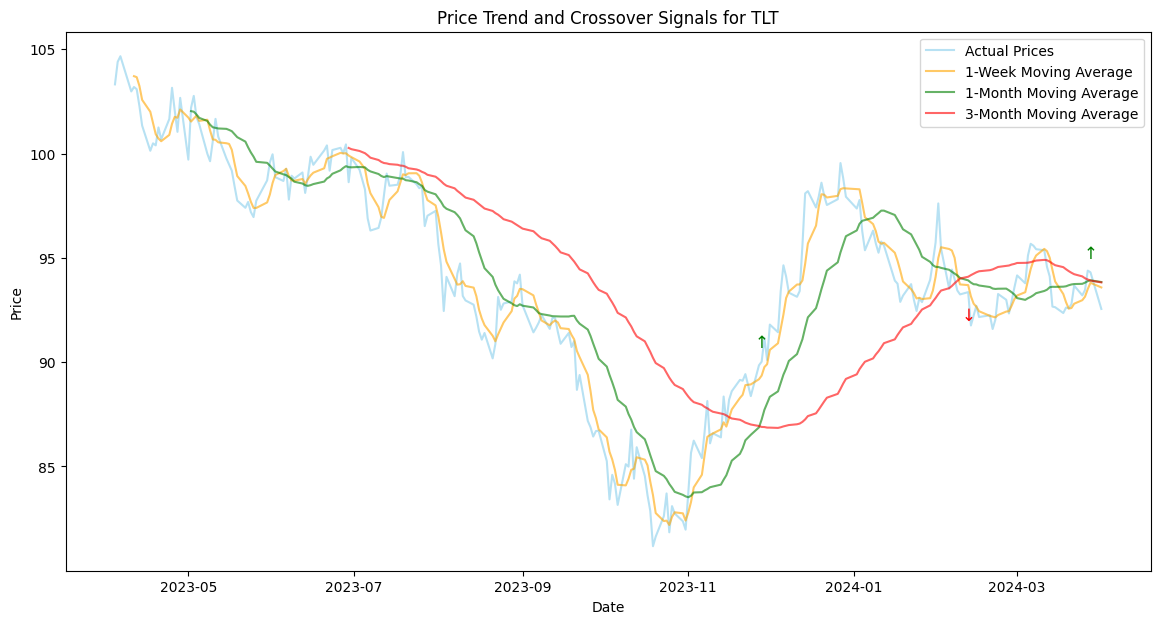

[*********************100%%**********************]  1 of 1 completed


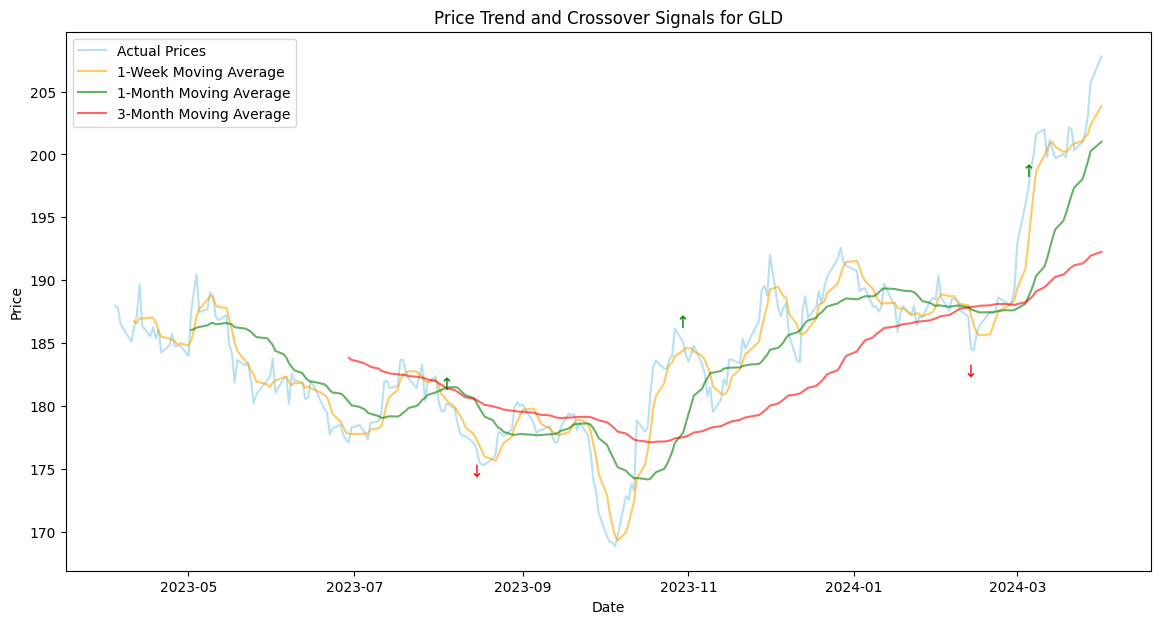

[*********************100%%**********************]  1 of 1 completed


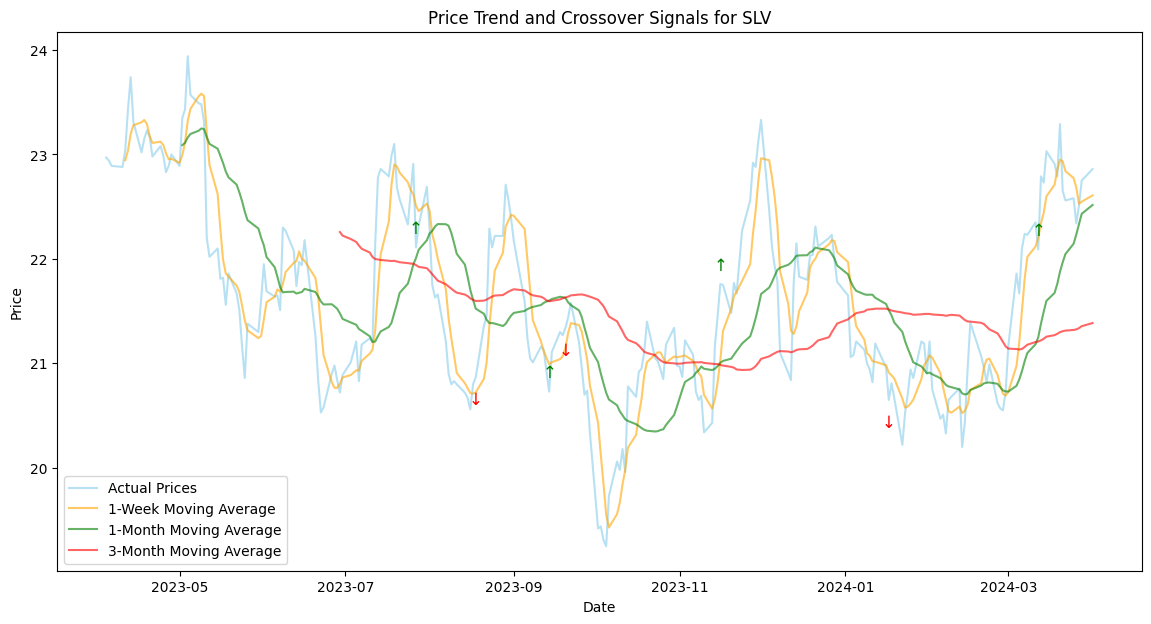

[*********************100%%**********************]  1 of 1 completed


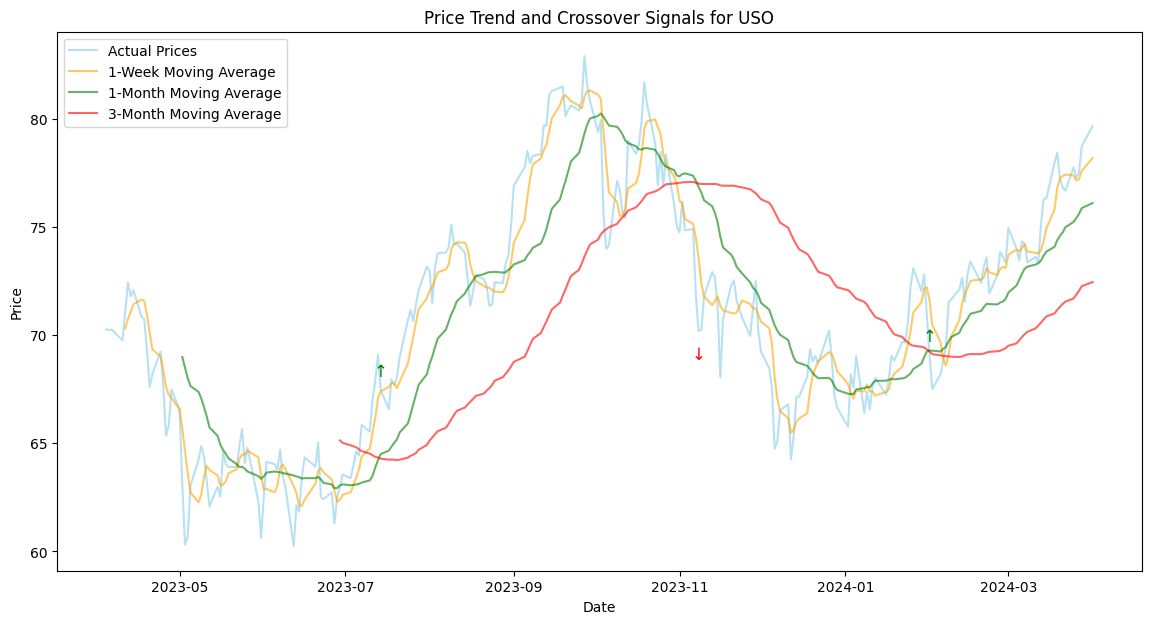

[*********************100%%**********************]  1 of 1 completed


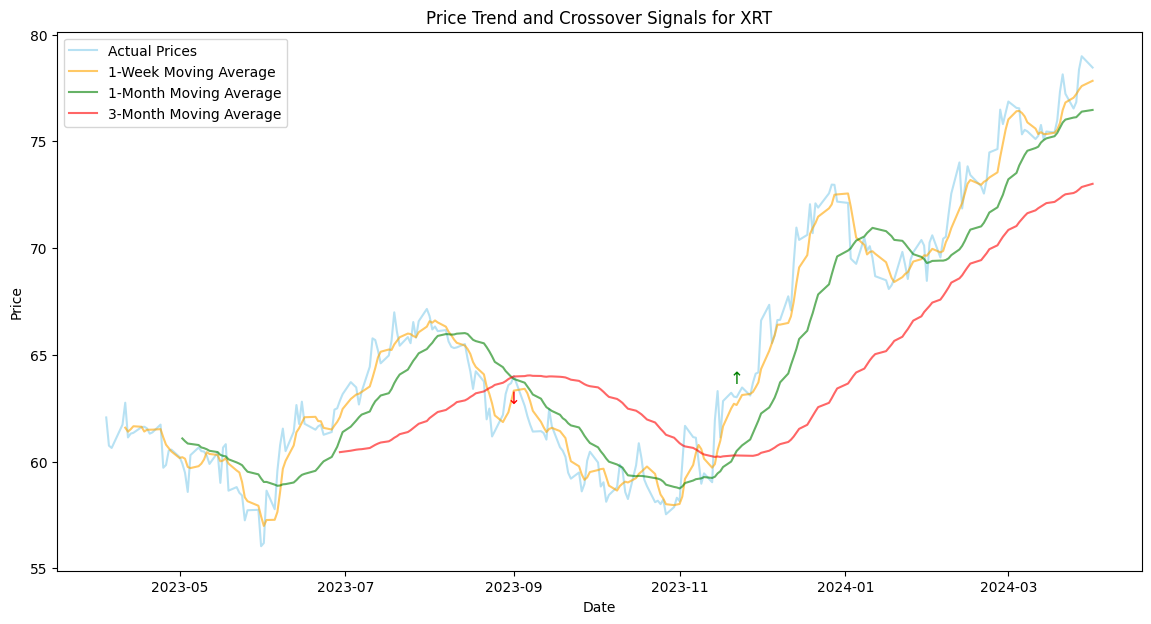

[*********************100%%**********************]  1 of 1 completed


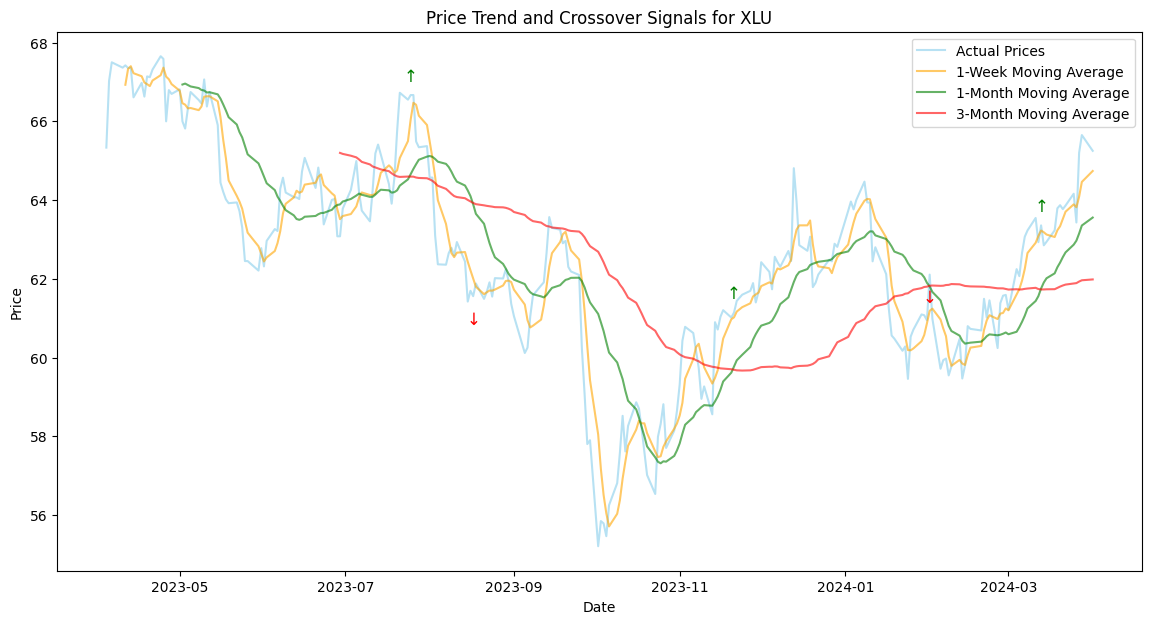

[*********************100%%**********************]  1 of 1 completed


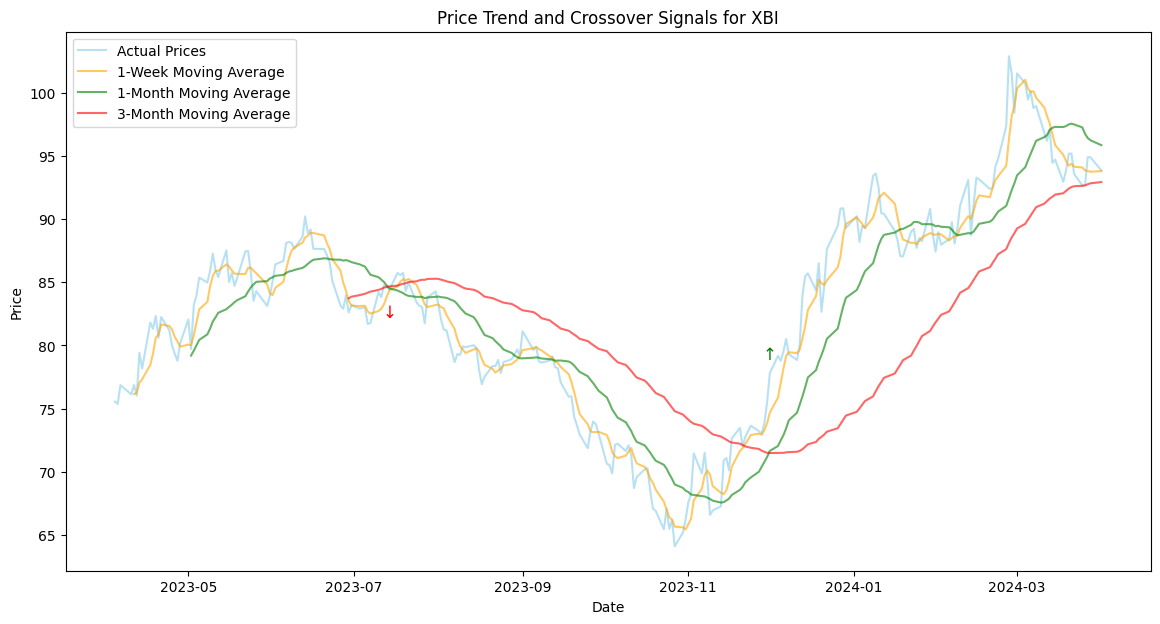

In [31]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Define your watchlist of stock tickers
tickers = ['SPY', 'IWM', 'QQQ', 'TLT', 'GLD', 'SLV', 'USO', 'XRT', 'XLU', 'XBI']

# Calculate yesterday's date
yesterday = datetime.now() - timedelta(1)
yesterday_str = yesterday.strftime('%Y-%m-%d')

oneyearago = datetime.now() - timedelta(365)
oneyearago_str = oneyearago.strftime('%Y-%m-%d')

for ticker in tickers:
    # Fetch historical data for the ticker up until yesterday
    data = yf.download(ticker, start=oneyearago_str, end=yesterday_str)

    # Calculate moving averages
    data['1-Week MA'] = data['Adj Close'].rolling(window=5).mean()
    data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()
    data['3-Month MA'] = data['Adj Close'].rolling(window=60).mean()

    # Find crossover points for buy and sell signals
    buy_signals = (data['1-Month MA'] > data['3-Month MA']) & (data['1-Month MA'].shift(1) <= data['3-Month MA'].shift(1))
    sell_signals = (data['1-Month MA'] < data['3-Month MA']) & (data['1-Month MA'].shift(1) >= data['3-Month MA'].shift(1))

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(data['Adj Close'], label='Actual Prices', color='skyblue', alpha=0.6)
    plt.plot(data['1-Week MA'], label='1-Week Moving Average', color='orange', alpha=0.6)
    plt.plot(data['1-Month MA'], label='1-Month Moving Average', color='green', alpha=0.6)
    plt.plot(data['3-Month MA'], label='3-Month Moving Average', color='red', alpha=0.6)

    # Plot buy signals
    for x in data[buy_signals].index:
        plt.annotate('↑', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,10), ha='center', color='green', fontsize=12)

    # Plot sell signals
    for x in data[sell_signals].index:
        plt.annotate('↓', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,-20), ha='center', color='red', fontsize=12)

    plt.title(f'Price Trend and Crossover Signals for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()